In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import GPyOpt
import GPy
from numba import jit

import time

from bo import bayesianOptimization
from acquisitions import ei, rollout_utility_archive, rollout_mcmc, policy
from utils import minimize, gap, generate_init, fit

In [2]:
norm = True
bounds = [(0, 1), (0, 1)]
objective_funcs = [GPyOpt.objective_examples.experiments2d.branin(normalized = norm), GPyOpt.objective_examples.experiments2d.goldstein(normalized = norm), GPyOpt.objective_examples.experiments2d.sixhumpcamel(normalized = norm)]
f_names = ["branin", "goldstein","sixhumpcamel"]

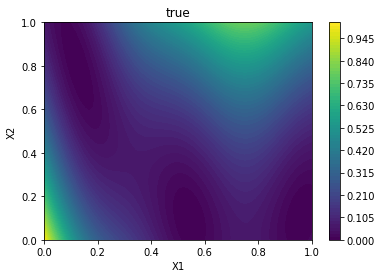

In [3]:
grid = 100
objective_true = objective_funcs[0]
x1 = np.linspace(bounds[0][0], bounds[0][1], grid)
x2 = np.linspace(bounds[1][0], bounds[1][1], grid)
X1, X2 = np.meshgrid(x1, x2)
_X = np.hstack((X1.reshape(grid*grid,1),X2.reshape(grid*grid,1)))
_Y = objective_true.f(_X)

plt.figure()    
plt.contourf(X1, X2, _Y.reshape((grid,grid)),grid)
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("true")
plt.show()

In [4]:
n=0
fmin = objective_funcs[n].f(minimize(objective_funcs[n].f,bounds,grid=500))[0][0]

In [5]:
fmin

5.668025434643928e-07

### Bench marking

In [6]:
# fix condition for lookahead
h=4
N_q = 5 # rollout
n_sample = 5 # mcmc
decay_rate=.9

In [7]:
# bench mark conditions
query_n = [5,10,15]
initpoints = [np.array([[0.8, 0.8]]), 
              np.array([[0.1, 0.05]]), 
              np.array([[0.5, 0.9]]),
              np.array([[0.1, 0.5]]),
              np.array([[0.4, 0.]])
             ]
n = len(initpoints)

# results
queries = {}
values = {}
gaps = {}

## ei

In [8]:
for l, obj in enumerate(objective_funcs):
    print(obj)
    objective = obj.f
    for N in query_n:
        _gaps=[]
        for i in range(n):
            initpoint = initpoints[i]
            _query, _value = bayesianOptimization(func_objective=objective,
                                                  func_acq=ei,
                                                  bounds=bounds,
                                                  depth_h = h,
                                                  N = N,
                                                  initial_n=0,
                                                  initpoint = initpoint,
                                                  N_q = N_q,
                                                  n_sample = n_sample,
                                                  ARD_Flag = False,
                                                  length_scale = 0.3
                                                  )
            queries[str(f_names[l])+"_ei_"+str(N)+"_"+str(i)] = _query
            values[str(f_names[l])+"_ei_"+str(N)+"_"+str(i)] = _value
            _gaps.append(gap(_value, fmin=0))
        gaps[str(f_names[l])+"_ei_"+str(N)] = _gaps

0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [9]:
queries
values
gaps

{'branin_ei_10': [0.9703075511768956,
  0.9688882319778467,
  0.9876764744697524,
  0.7910686265980164,
  0.936076902529274],
 'branin_ei_15': [0.99347263343809,
  0.9931606208878371,
  0.9876764744697524,
  0.9357423839976253,
  0.936076902529274],
 'branin_ei_5': [0.9703075511768956,
  0.9688882319778467,
  0.9518783789832983,
  0.7910686265980164,
  0.936076902529274],
 'goldstein_ei_10': [0.9050072902095272,
  0.9941272035009465,
  0.9998530369641698,
  0.964700656407496,
  0.9975985558728058],
 'goldstein_ei_15': [0.9468172854758222,
  0.9941272035009465,
  0.9998530369641698,
  0.997608356093035,
  0.9975985558728058],
 'goldstein_ei_5': [0.9050072902095272,
  0.9941272035009465,
  0.9980418761374802,
  0.6805793310867163,
  0.9859136662033735],
 'sixhumpcamel_ei_10': [0.6899103823448789,
  0.8741727809654262,
  0.0,
  0.7565928293199576,
  0.5298366026005251],
 'sixhumpcamel_ei_15': [0.7204806467831689,
  0.8741727809654262,
  0.0,
  0.8578283805623993,
  0.5298366026005251],
 '

## rollout mcmc

In [ ]:
for l, obj in enumerate(objective_funcs):
    print(obj)
    objective = obj.f
    for N in query_n:
        _gaps=[]
        for i in range(n):
            initpoint = initpoints[i]
            _query, _value = bayesianOptimization(func_objective=objective,
                                                  func_acq=rollout_mcmc,
                                                  bounds=bounds,
                                                  depth_h = h,
                                                  N = N,
                                                  initial_n=0,
                                                  initpoint = initpoint,
                                                  N_q = N_q,
                                                  n_sample = n_sample,
                                                  ARD_Flag = False,
                                                  length_scale = 0.3
                                                  )
            queries[str(f_names[l])+"_ei_"+str(N)+"_"+str(i)] = _query
            values[str(f_names[l])+"_ei_"+str(N)+"_"+str(i)] = _value
            _gaps.append(gap(_value, fmin=0))
        gaps[str(f_names[l])+"_ei_"+str(N)] = _gaps

0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
0
1
2
3
4
0
1
2
3


In [ ]:
queries
values
gaps

In [ ]:
import pickle
with open('191218_3_eivsmcmc_queries.pickle', mode='wb') as f:
     pickle.dump(queries, f)
with open('191218_3_eivsmcmc_values.pickle', mode='wb') as f:
     pickle.dump(values, f)
with open('191218_3_eivsmcmc_gaps.pickle', mode='wb') as f:
     pickle.dump(gaps, f)